In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv("netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
print(len(df['rating'].unique()))

14


In [15]:
ratingwise = df.groupby(['rating'])
size = ratingwise.count()['show_id']
print(len(size))

14


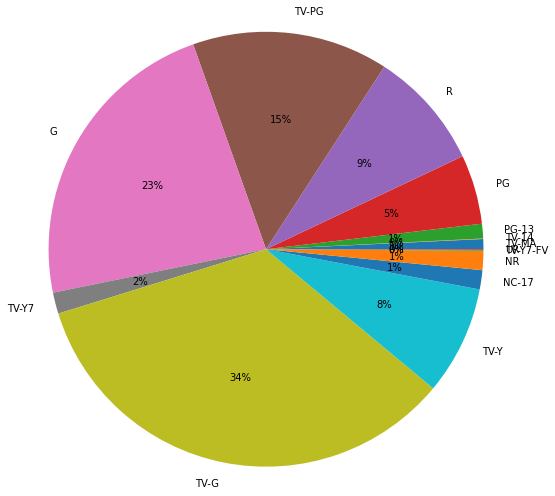

<Figure size 2160x3168 with 0 Axes>

In [16]:
plt.pie(size,labels=df['rating'].unique(),radius=2.5,autopct='%.0f%%',pctdistance=0.6)
plt.figure(figsize=(30,44))
plt.show()

In [17]:
import plotly.express as px

In [18]:
z = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [20]:
df['director'].str.split(',',expand=True).stack()

7     0           Haile Gerima
8     0        Andy Devonshire
9     0         Theodore Melfi
12    0    Christian Schwochow
24    0             S. Shankar
                  ...         
8801  0        Majid Al Ansari
8802  0          David Fincher
8804  0        Ruben Fleischer
8805  0           Peter Hewitt
8806  0            Mozez Singh
Length: 5960, dtype: object

In [21]:
df['director'].str.split(',',expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
7,Haile Gerima,None,None,None,None,None,None,None,None,None,None,None,None
8,Andy Devonshire,None,None,None,None,None,None,None,None,None,None,None,None
9,Theodore Melfi,None,None,None,None,None,None,None,None,None,None,None,None
12,Christian Schwochow,None,None,None,None,None,None,None,None,None,None,None,None
24,S. Shankar,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Majid Al Ansari,None,None,None,None,None,None,None,None,None,None,None,None
8802,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
8804,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None
8805,Peter Hewitt,None,None,None,None,None,None,None,None,None,None,None,None


In [22]:
filtered_directors=pd.DataFrame(df['director'].str.split(",",expand=True).stack())

In [23]:
filtered_directors.columns = ['Directors']

In [24]:
directorwise=filtered_directors.groupby(['Directors']).size().reset_index(name="Most_no_of_Films")

In [25]:
directorwise.dtypes

Directors           object
Most_no_of_Films     int64
dtype: object

In [26]:
directorwise

,Directors,Most_no_of_Films
0,Aaron Moorhead,2
1,Abbas Alibhai Burmawalla,1
2,Abdullah Al Noor,1
3,Abhinav Shiv Tiwari,1
4,Adam Carolla,2
...,...,...
4407,Çagan Irmak,1
4408,Ísold Uggadóttir,1
4409,Óskar Thór Axelsson,1
4410,Ömer Faruk Sorak,2


In [27]:
directorwise=directorwise.sort_values(by=['Most_no_of_Films'],ascending=False)

In [28]:
top5=directorwise.head(5)

In [29]:
top5

,Directors,Most_no_of_Films
3486,Raúl Campos,18
201,Jan Suter,18
2081,Jay Karas,15
2761,Marcus Raboy,15
1144,Cathy Garcia-Molina,13


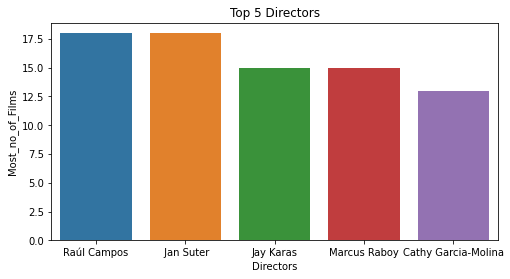

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=top5,x='Directors',y='Most_no_of_Films')
plt.title("Top 5 Directors")
plt.show()


Finding Top 5 Actors with most no of Films

In [31]:
actors_df=pd.DataFrame(df['cast'].str.split(",",expand=True).stack())

In [32]:
actors_df

0
7    0            Kofi Ghanaba
     1     Oyafunmike Ogunlano
     2          Alexandra Duah
     3             Nick Medley
     4              Mutabaruka
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[42711 rows x 1 columns]

In [33]:
actors_df.columns=['Actors']

In [34]:
actors_df

Actors
7    0            Kofi Ghanaba
     1     Oyafunmike Ogunlano
     2          Alexandra Duah
     3             Nick Medley
     4              Mutabaruka
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[42711 rows x 1 columns]

In [35]:
actors=actors_df.groupby('Actors').size().reset_index(name="Most_Films")

In [36]:
actors

,Actors,Most_Films
0,Jr.,1
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2Mex,1
4,50 Cent,4
...,...,...
27302,Çetin Tekindor,1
27303,Úrsula Corberó,1
27304,İbrahim Büyükak,1
27305,Şahin Irmak,1


In [37]:
actors=actors.sort_values(by="Most_Films",ascending=False)

In [38]:
top5_actors=actors.head(5)

In [39]:
top5_actors.head()

,Actors,Most_Films
1887,Anupam Kher,38
16469,Om Puri,27
16696,Paresh Rawal,25
26741,Shah Rukh Khan,25
3031,Boman Irani,25


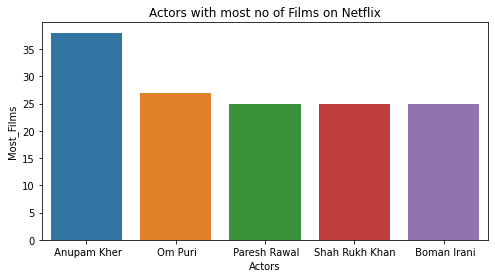

In [40]:
plt.figure(figsize=(8,4))
plt.title("Actors with most no of Films on Netflix")
sns.barplot(data=top5_actors,x='Actors',y="Most_Films")
plt.show()

In [49]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2


,Release Year,type,Total Content
0,1942,Movie,1
1,1944,Movie,1
2,1945,Movie,1
3,1946,Movie,1
4,1947,Movie,1
...,...,...,...
82,2019,TV Show,24
83,2020,Movie,409
84,2020,TV Show,33
85,2021,Movie,146


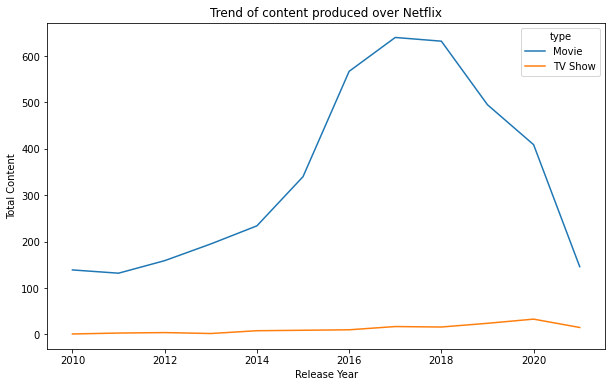

In [54]:
df2=df2[df2['Release Year']>=2010]
plt.figure(figsize=(10,6))
sns.lineplot(data = df2, x="Release Year", y="Total Content", color='type',hue='type')
plt.title("Trend of content produced over Netflix")
plt.show()


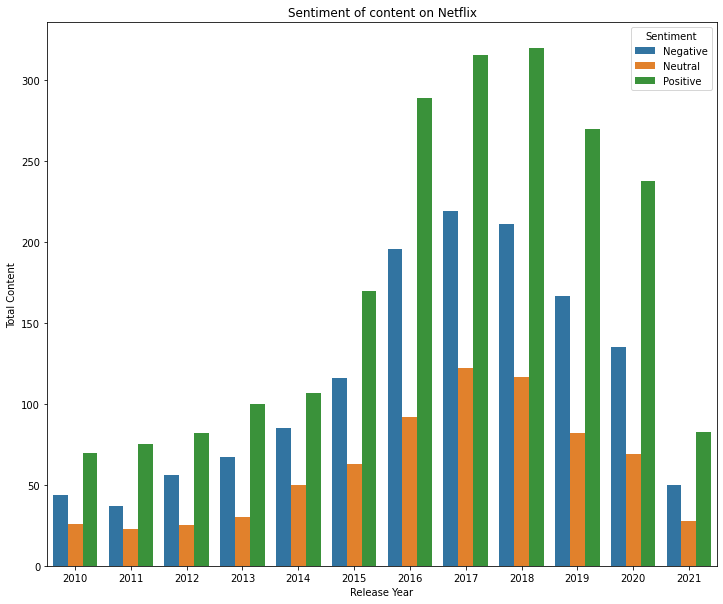

In [64]:
from textblob import TextBlob
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
plt.figure(figsize=(12,10))
fig4 = sns.barplot(data=dfx, x="Release Year", y="Total Content",hue="Sentiment")
plt.title(label="Sentiment of content on Netflix")
plt.show()